### **MA5204: Aprendizaje de Máquinas**

**Departamento de Ingeniería Matemática, Universidad de Chile**

**Profesor:** Felipe Tobar

**Ayudantes:** Alejandro Cuevas, Mauricio Araneda, Mauricio Romero

*Verificado 27 abril 2023*

# Support Vector machines

En este notebook se tienen 2 ejemplos de clasificación con support vector machines, 
1. Con la función de decisión XOR.
2. Clasificación si usuario de red social compra o no producto.

## Ejemplo 1: XOR

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Creamos nuestros puntos, muestreamos de una Gaussiana en $\mathbb{R}^2$ y luego dependiendo del cuadrante asignamos la clase $0$ o $1$.

In [24]:
# numero de puntos
n = 2000

# medias 
mean_A = np.array([0, 0])

# matriz covarianza
std = np.eye(2)

# crea datos de una N(0, I) en 2 dim
X= np.random.multivariate_normal(mean_A, std, size =n)

# crea etiquetas
y = np.zeros(n)

for i in range(n):
    if X[i][0]*X[i][1] >= 0:
        y[i]=1
    else:
        y[i]= 0

In [25]:
X

array([[ 1.1632078 , -0.89122625],
       [-0.10615921, -1.6204356 ],
       [ 0.56050685, -0.37692009],
       ...,
       [ 2.65586086, -1.90708053],
       [-0.49268235, -1.54611414],
       [-0.32196402, -0.26971871]])

In [26]:
y

array([0., 1., 0., ..., 0., 1., 1.])

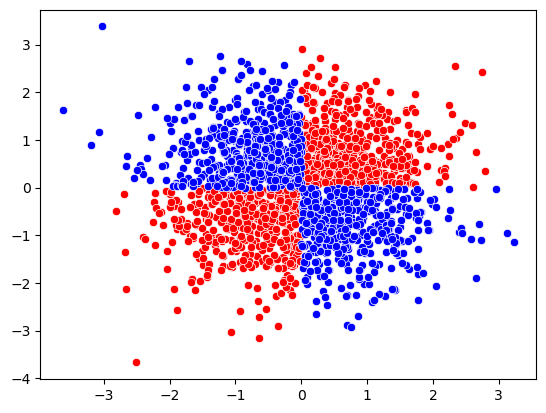

In [27]:
grupo1 = X[y==1]
grupo2 = X[y==0]

plt.scatter(grupo1[:,0], grupo1[:,1], c='red', edgecolor='w', linewidth=0.5)
plt.scatter(grupo2[:,0], grupo2[:,1], c='blue', edgecolor='w', linewidth=0.5)

Separamos entre conjunto de entrenamiento y prueba y luego normalizamos los datos.

In [28]:
# Separamos los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Es importante escalar los datos al usar SVM
from sklearn.preprocessing import StandardScaler

# crea instancia
sc = StandardScaler()

# entrena y transforma
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Entrenamos el clasificador, para ello usamos SVC (Support Vector classifier)
from sklearn.svm import SVC

# instancia clasificador
classifier = SVC(kernel = 'poly', degree =5, random_state = 0,verbose=True)

# entrena
classifier.fit(X_train, y_train)

[LibSVM]..............................................*..........................*...............*.......................*....*..*.................................................................................*
optimization finished, #iter = 195090
obj = -1491.216716, rho = -0.060369
nSV = 1494, nBSV = 1487
Total nSV = 1494


SVC(degree=5, kernel='poly', random_state=0, verbose=True)

In [34]:
#Generamos predicciones con nuestros datos
y_pred = classifier.predict(X_test)

In [35]:
#Vemos que tal nuestros scores
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

vmat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.93      0.65       242
         1.0       0.67      0.14      0.24       258

    accuracy                           0.52       500
   macro avg       0.59      0.53      0.44       500
weighted avg       0.59      0.52      0.44       500



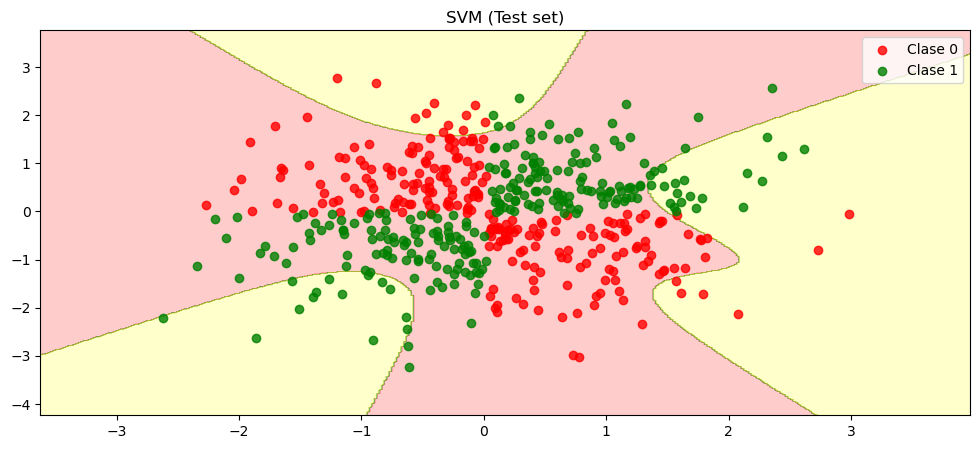

In [36]:
# Visualizamos nuestros resultados en el set de validación
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.02))


plt.figure(figsize=(12, 5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colorlist = ['red', 'green']
for i in range(2):
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1],
                c=colorlist[i], label='Clase ' + str(i), alpha=0.8)
    
plt.title('SVM (Test set)')
plt.legend()
plt.show()

# Ejemplo 2: Social Network

Se tienen datos de una red social, donde se tiene sexo, edad, salario estimado y un perfil de ususario, y se quiere clasificador si son compradores de un producto o no (0 o 1).

In [37]:
# Importar el dataset
dataset = pd.read_csv('../datos/Social_Network_data.csv')
X = dataset.iloc[:, [1,2,3]].values
y = dataset.iloc[:, 4].values


In [38]:
#La primera variable y la segunda son categóricas
X

#La primera es el perfil memero (De 5): 4 chan, normie, Fedora, nihilista o dank

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [39]:
#Codificamos variables binarias categoricas (como sexo por ejemplo), usando LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [40]:
#Para variables categoricas que no sean binarias, primero se ocupa labelencoder...
X[:,0]=labelencoder_X.fit_transform(X[:, 0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [41]:
X[1]

array([1, 35, 20000], dtype=object)

In [43]:
#Y despues One-Hot_encoder 
onehotencoder = OneHotEncoder(categories='auto')
#En categorical_features se coloca un arreglo en donde van las columnas de variables categoricas (En este caso solo la primera columna)

X = onehotencoder.fit_transform(X).toarray()

In [44]:
X[1]

array([1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [45]:
# Separamos los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Es importante escalar los datos al usar SVM
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
# Entrenamos el clasificador, para ello usamos SVC (Support Vector classifier)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,verbose=True, gamma='scale')
classifier.fit(X_train, y_train)

[LibSVM]*.*
optimization finished, #iter = 385
obj = -123.046858, rho = 0.635257
nSV = 256, nBSV = 115
Total nSV = 256


SVC(random_state=0, verbose=True)

In [53]:
#Generamos predicciones con nuestros datos
y_pred = classifier.predict(X_test)

In [54]:
#Vemos que tal nuestros scores
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
vmat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        58
           1       0.67      0.73      0.70        22

    accuracy                           0.82        80
   macro avg       0.78      0.79      0.79        80
weighted avg       0.83      0.82      0.83        80

